# Exploratory Data Analysis

### Navigation
* [README](https://github.com/SelinaFischer/unmasking_hidden_cyber_threats_t5/blob/main/README.md)
* [Raw data](https://github.com/SelinaFischer/unmasking_hidden_cyber_threats_t5/tree/main/data/raw)
* [ETL pipeline](https://github.com/SelinaFischer/unmasking_hidden_cyber_threats_t5/blob/main/jupyter_notebooks/1.%20etl_data_prep.ipynb)
* [Hypothesis Validation](https://github.com/SelinaFischer/unmasking_hidden_cyber_threats_t5/blob/main/jupyter_notebooks/3.%20hypothesis_validation.ipynb)

### Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data adn check if it's loaded correctly
df = pd.read_csv('../data/cleaned/cleaned_train.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,log_src_bytes
0,0,tcp,ftp_data,SF,491,0,False,0,False,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,6.198479
1,0,udp,other,SF,146,0,False,0,False,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,4.990433
2,0,tcp,private,S0,0,0,False,0,False,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,0.000000
3,0,tcp,http,SF,232,8153,False,0,False,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,5.451038
4,0,tcp,http,SF,199,420,False,0,False,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,5.298317


### check for overall infomatin about the data 

In [3]:
# check for basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25184 entries, 0 to 25183
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25184 non-null  int64  
 1   protocol_type                25184 non-null  object 
 2   service                      25184 non-null  object 
 3   flag                         25184 non-null  object 
 4   src_bytes                    25184 non-null  int64  
 5   dst_bytes                    25184 non-null  int64  
 6   land                         25184 non-null  bool   
 7   wrong_fragment               25184 non-null  int64  
 8   urgent                       25184 non-null  bool   
 9   hot                          25184 non-null  int64  
 10  num_failed_logins            25184 non-null  int64  
 11  logged_in                    25184 non-null  bool   
 12  num_compromised              25184 non-null  int64  
 13  root_shell      

In [4]:
# Descriptive status
df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,num_compromised,su_attempted,num_root,num_file_creations,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,log_src_bytes
count,25184.000000,2.518400e+04,2.518400e+04,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,...,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000,25184.000000
mean,305.151009,2.433834e+04,3.492956e+03,0.023745,0.198102,0.001191,0.227922,0.001350,0.249921,0.014732,...,115.094346,0.519925,0.082513,0.147469,0.031854,0.285886,0.279896,0.117790,0.118807,3.234155
std,2686.976829,2.411188e+06,8.884481e+04,0.260262,2.154541,0.045425,10.419006,0.048793,11.502668,0.529686,...,110.649559,0.448949,0.187130,0.308410,0.110591,0.445361,0.446099,0.305877,0.317377,2.985165
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.806662
75%,0.000000,2.790000e+02,5.310000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,5.634790
max,42862.000000,3.817091e+08,5.151385e+06,3.000000,77.000000,4.000000,884.000000,2.000000,975.000000,40.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.760169


### Activity distribution

Class Distribution:
class
normal     13442
anomaly    11742
Name: count, dtype: int64


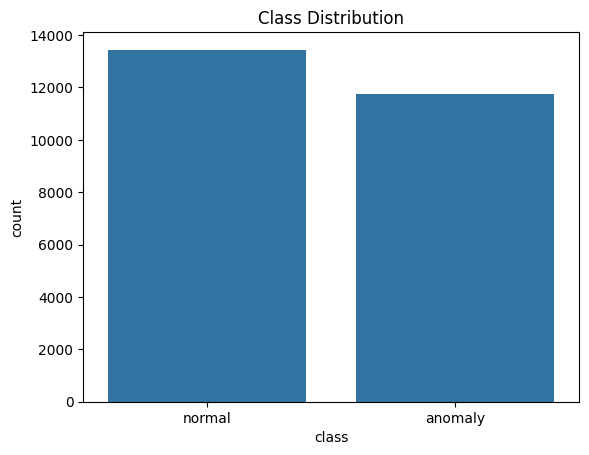

In [5]:
# Show class distribution
print("Class Distribution:")
print(df['class'].value_counts())  

# plot a graph
sns.countplot(data=df, x='class')
plt.title("Class Distribution")
plt.show()


This is the disctribution of normal activity and abnormal activity

### src_bytes distributions by class

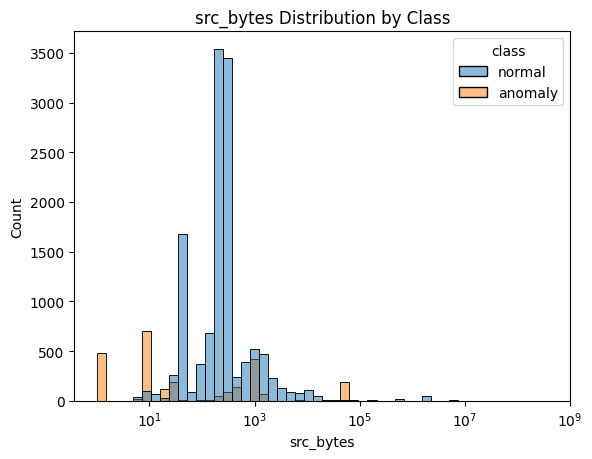

In [6]:
# creating histgram with src_bytes distribution by class
sns.histplot(data=df, x='src_bytes', hue='class', bins=50, log_scale=True)
plt.title("src_bytes Distribution by Class")
plt.show()

Normal traffic tends to cluster at lower `src_bytes`, while anomalous traffic appears more spread out, including at both low and high extremes. However, due to significant overlap between the classes, this feature alone may not be a reliable indicator of abnormal activity.

### Top 10 service type by class

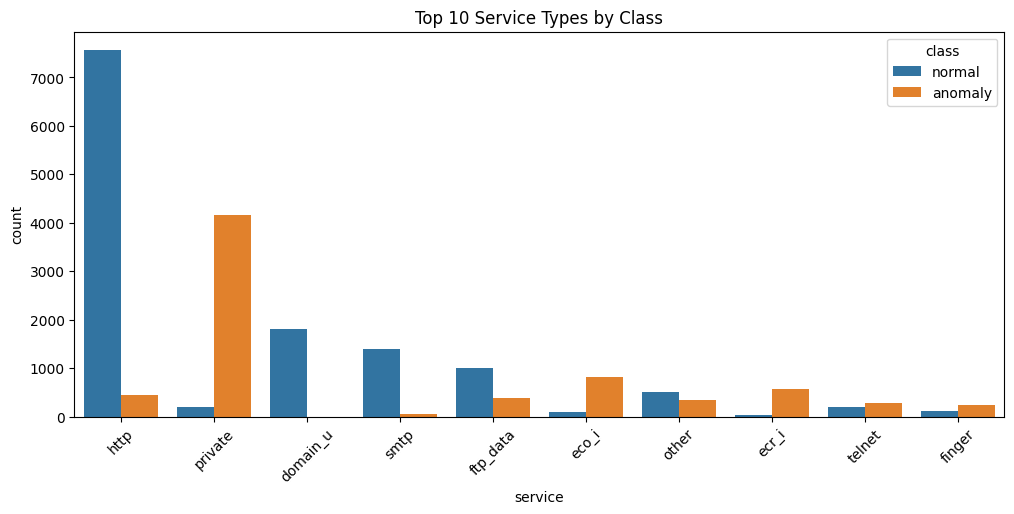

In [7]:
# creating bar chart with top 10 service type 
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='service', hue='class', order=df['service'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Service Types by Class")
plt.show()

The `private` service type stands out with the highest number of anomaly cases, suggesting it may be a key indicator or target of malicious activity.

### Histgrapm of log duration by class

This graph is to see the distribution of log druration by class

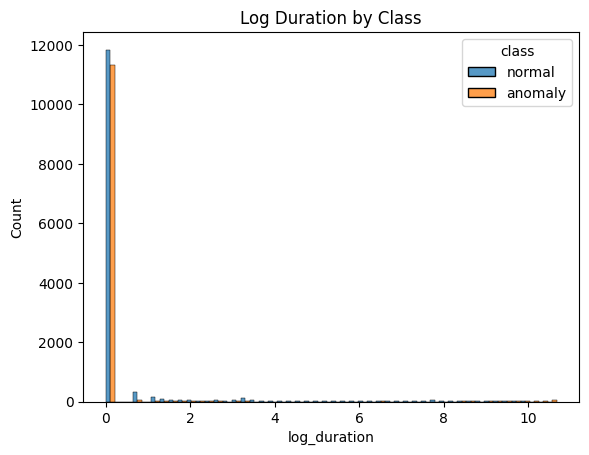

In [8]:
df['log_duration'] = np.log1p(df['duration'])
sns.histplot(data=df, x='log_duration', hue='class', bins=50,  multiple='dodge')
plt.title("Log Duration by Class")
plt.show()

The distribution of log-transformed duration by class does not reveal a strong or easily interpretable pattern. While there are differences in counts, the overlap between normal and anomalous traffic across most duration ranges makes it difficult to draw a clear assumption from this graph alone

In [9]:
# class feature contains whether the activity is normal or not
# Converting class into binary so that nomal or anormaly activity can be analysed in correlation matrix
df['class_numeric'] = df['class'].apply(lambda x: 1 if x == 'anomaly' else 0)
correlations = df.corr(numeric_only=True)['class_numeric'].sort_values(ascending=False)
print(correlations)

class_numeric                  1.000000
dst_host_srv_serror_rate       0.653691
dst_host_serror_rate           0.651031
serror_rate                    0.649933
srv_serror_rate                0.647747
count                          0.578729
dst_host_count                 0.368715
dst_host_srv_rerror_rate       0.256960
rerror_rate                    0.256732
dst_host_rerror_rate           0.256218
srv_rerror_rate                0.256113
dst_host_diff_srv_rate         0.238058
diff_srv_rate                  0.193665
wrong_fragment                 0.097619
dst_host_same_src_port_rate    0.092978
dst_host_srv_diff_host_rate    0.062882
duration                       0.050884
urgent                         0.006742
src_bytes                      0.005741
srv_count                      0.002296
land                           0.000603
num_failed_logins              0.000022
dst_bytes                     -0.010959
hot                           -0.012861
num_shells                    -0.013460


### Check for outliers

In [10]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Example usage:
outliers_duration = detect_outliers_iqr(df, 'duration')
print(f"Outliers in 'duration': {len(outliers_duration)} rows")
print(outliers_duration.head())


Outliers in 'duration': 2024 rows
    duration protocol_type  service flag  src_bytes  dst_bytes   land  \
23      5607           udp    other   SF        147        105  False   
25       507           tcp   telnet   SF        437      14421  False   
35         1           udp  private   SF        105        147  False   
42         2           tcp     smtp   SF       1591        372  False   
43      9052           udp    other   SF        146        105  False   

    wrong_fragment  urgent  hot  ...  dst_host_same_src_port_rate  \
23               0   False    0  ...                         1.00   
25               0   False    0  ...                         0.00   
35               0   False    0  ...                         0.05   
42               0   False    0  ...                         0.01   
43               0   False    0  ...                         0.99   

    dst_host_srv_diff_host_rate  dst_host_serror_rate  \
23                          0.0                  0.00  

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Track total outliers
total_outliers = 0

print("Outlier Detection Report (IQR Method):")
print("-" * 40)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    total_outliers += outliers
    print(f"{col}: {outliers} outliers")

print("-" * 40)
print(f"Total outlier values detected: {total_outliers}")

# Justification for not removing
print("\nNote:")
print("Outliers were reviewed across all numeric columns using the IQR method.")
print("However, they were retained in the dataset as they may represent")
print("important patterns or rare events relevant to anomaly detection or")
print("unusual behaviours in network traffic.")


Outlier Detection Report (IQR Method):
----------------------------------------
duration: 2024 outliers
src_bytes: 2725 outliers
dst_bytes: 4698 outliers
wrong_fragment: 224 outliers
hot: 520 outliers
num_failed_logins: 23 outliers
num_compromised: 272 outliers
su_attempted: 21 outliers
num_root: 134 outliers
num_file_creations: 66 outliers
num_access_files: 79 outliers
count: 626 outliers
srv_count: 2398 outliers
serror_rate: 0 outliers
srv_serror_rate: 0 outliers
rerror_rate: 3206 outliers
srv_rerror_rate: 3233 outliers
same_srv_rate: 0 outliers
diff_srv_rate: 1536 outliers
srv_diff_host_rate: 5675 outliers
dst_host_count: 0 outliers
dst_host_srv_count: 0 outliers
dst_host_same_srv_rate: 0 outliers
dst_host_diff_srv_rate: 2101 outliers
dst_host_same_src_port_rate: 4985 outliers
dst_host_srv_diff_host_rate: 2297 outliers
dst_host_serror_rate: 0 outliers
dst_host_srv_serror_rate: 0 outliers
dst_host_rerror_rate: 4500 outliers
dst_host_srv_rerror_rate: 3843 outliers
log_src_bytes: 66 ou

Outliers were reviewed across all numeric columns using the IQR method. However, they were retained in the dataset as they may represent important patterns or rare events relevant to anomaly detection or unusual behaviours in network traffic.

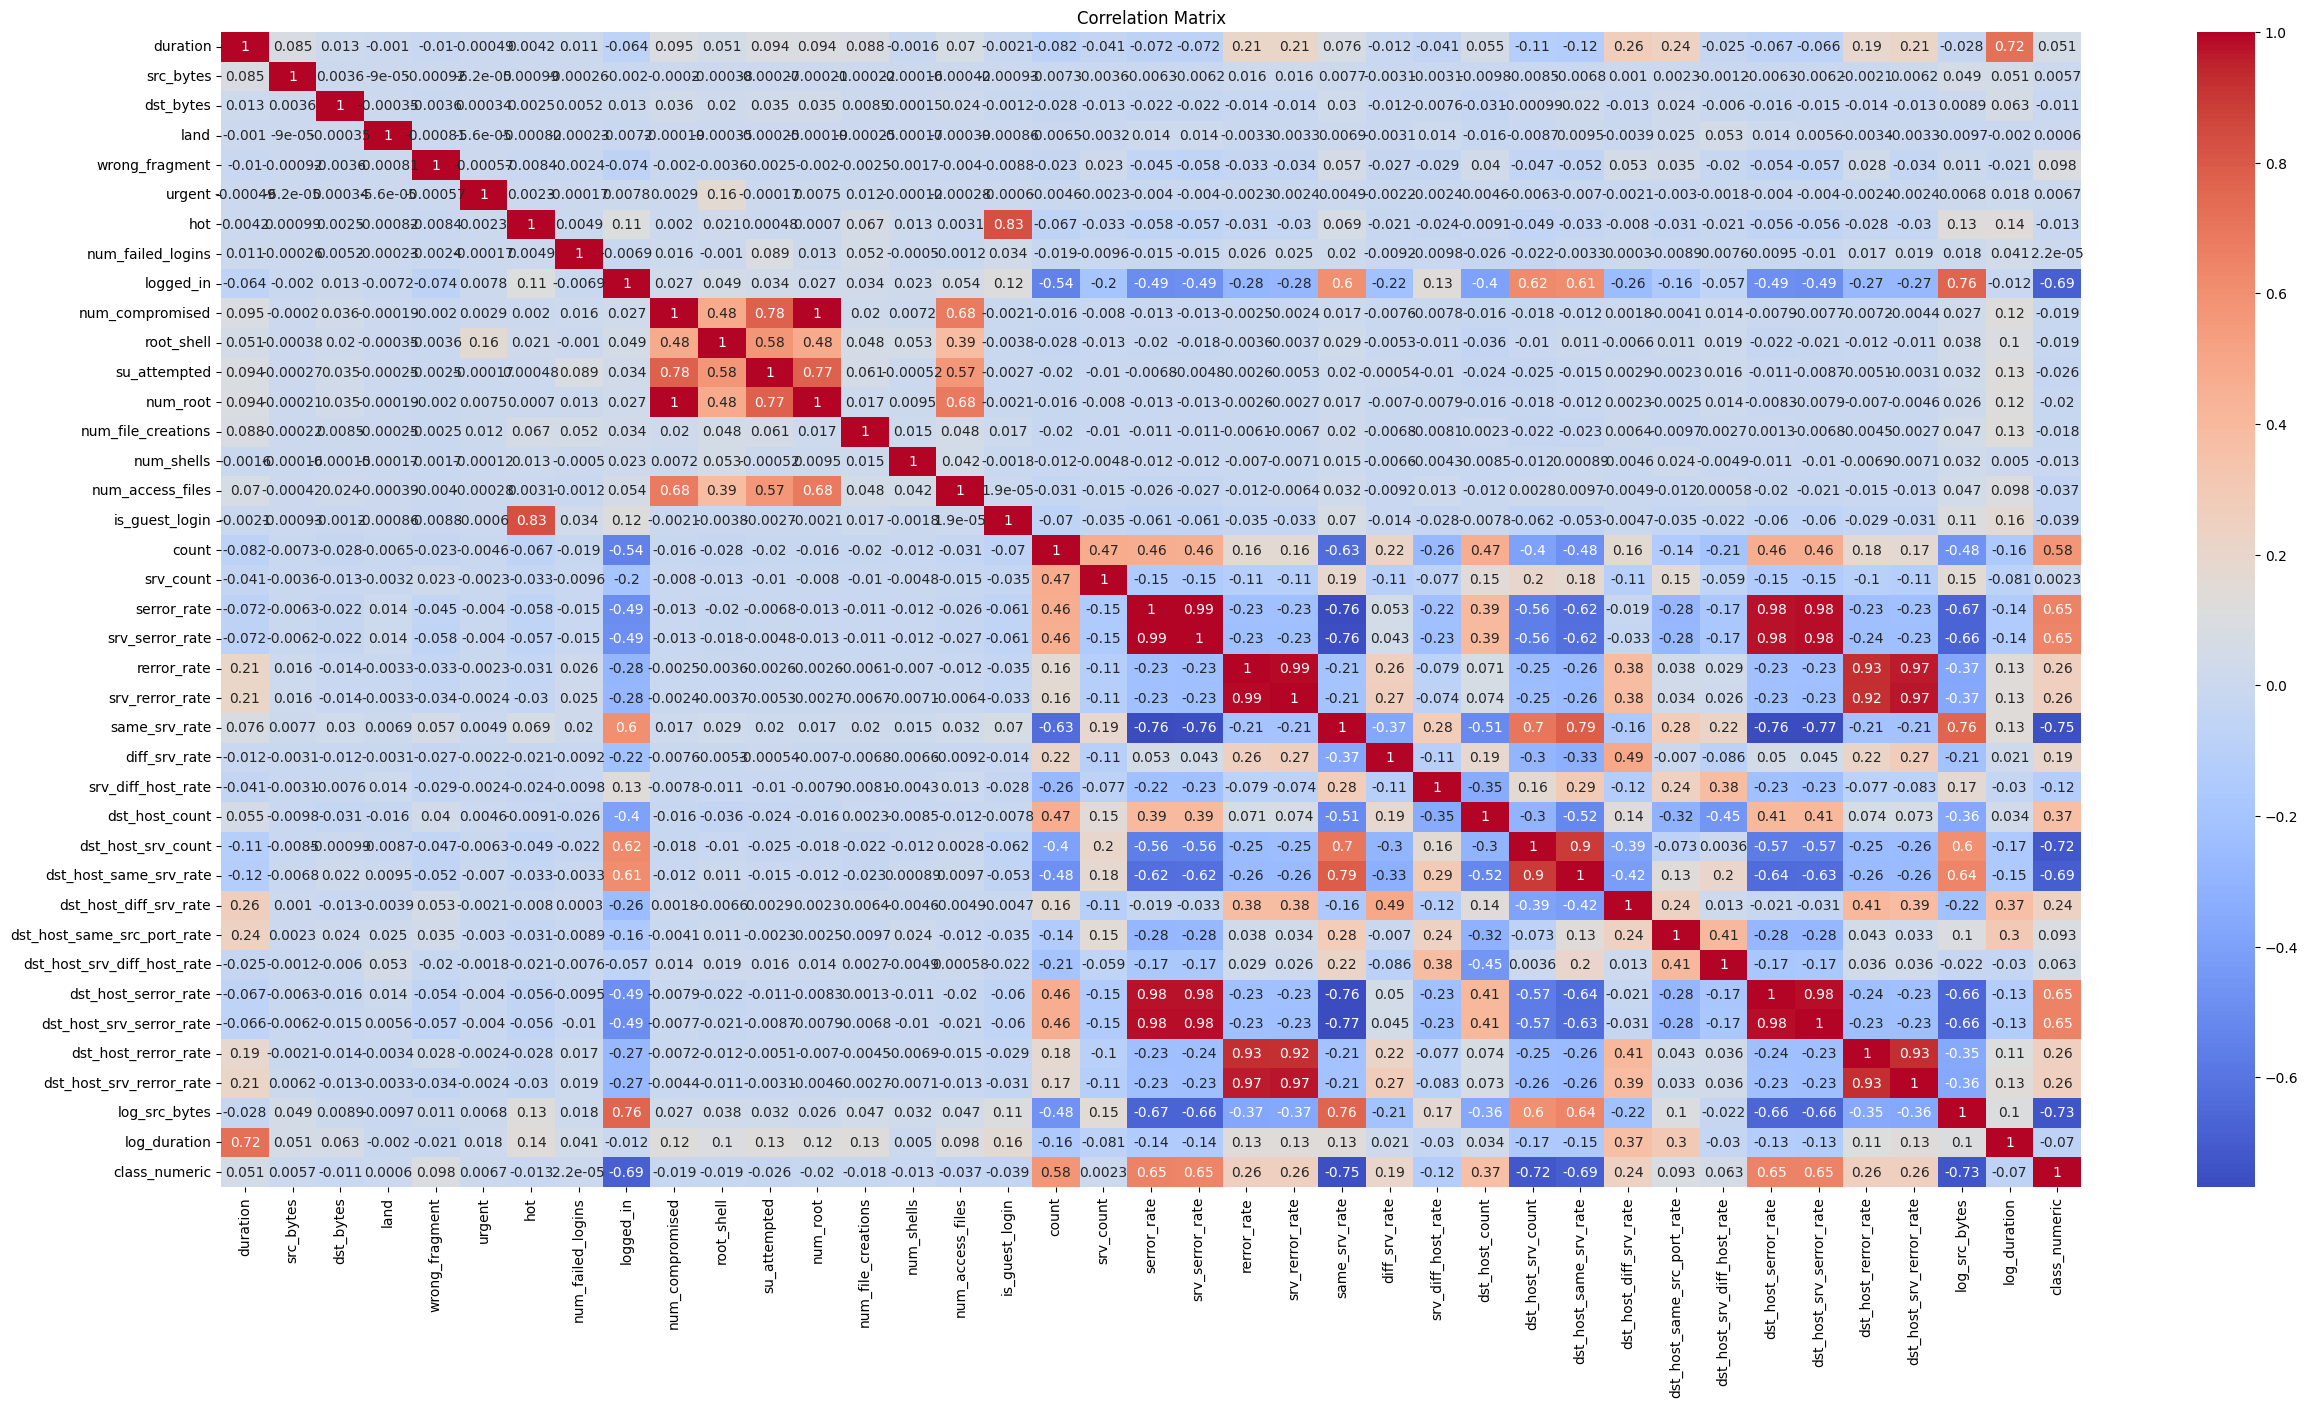

In [12]:
# create correlation map
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

`count`, `serror_rate`,`srv_serror_rate`, `dst_host_serror_rate`,`dst_host_srv_rerror_rate`have high correlation to abnormal activities.

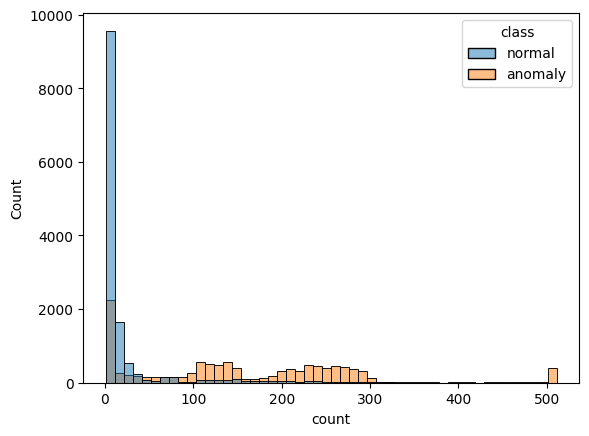

In [13]:
# create histplot using count feature
sns.histplot(data=df, x='count', hue='class', bins=50)
plt.show()

The `count` feature, which measures the number of recent connections to the same host, shows a distinct pattern between classes. Normal traffic is highly concentrated around lower values of `count`, whereas anomalous traffic spans a much wider range, particularly between 100 and 300. This suggests that higher connection frequency to a single host may be a strong indicator of anomaly

Text(0.5, 1.0, 'serror rate distribution')

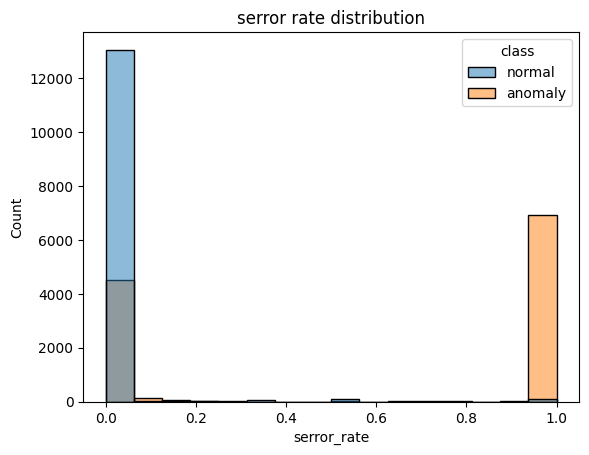

In [14]:
# serror rate histgram
sns.histplot(data=df, x='serror_rate', hue='class')
plt.title("serror rate distribution")

The `serror_rate` feature shows a strong class separation. Most normal traffic has a `serror_rate` close to 0, while most anomalous traffic has a `serror_rate` close to 1. This suggests that a high SYN error rate is a strong indicator of malicious activity.

Text(0.5, 1.0, 'srv serror rate distribution')

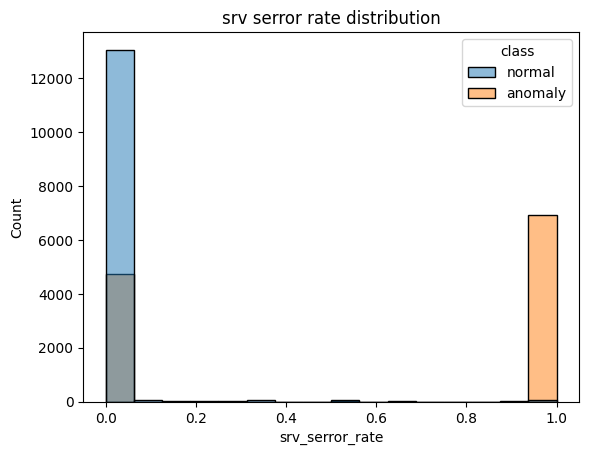

In [15]:
# srv_serror_rate histgram
sns.histplot(data=df, x='srv_serror_rate', hue='class')
plt.title("srv serror rate distribution")

Similar to `serror_rate`, the `srv_serror_rate` (SYN error rate for the same service) is near 0 for normal traffic and near 1 for anomalies. This reinforces that failed connection attempts to the same service are highly correlated with malicious behavior.

Text(0.5, 1.0, 'dst_hosgt_serror_rate distribution')

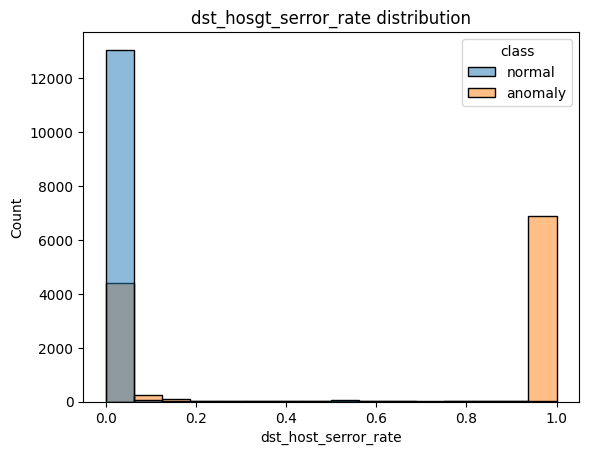

In [16]:
# dst_host_serror_rate histgram
sns.histplot(data=df, x='dst_host_serror_rate', hue ='class')
plt.title("dst_hosgt_serror_rate distribution")

For `dst_host_srv_rerror_rate` (connection reset errors to the same service on the same host), we again see a strong difference: normal traffic has near-zero error rates, while anomalies peak at the maximum (1.0). This feature appears to be another reliable signal for detecting abnormal activity.

Text(0.5, 1.0, 'dst_host_srv_rerror_rate distribution')

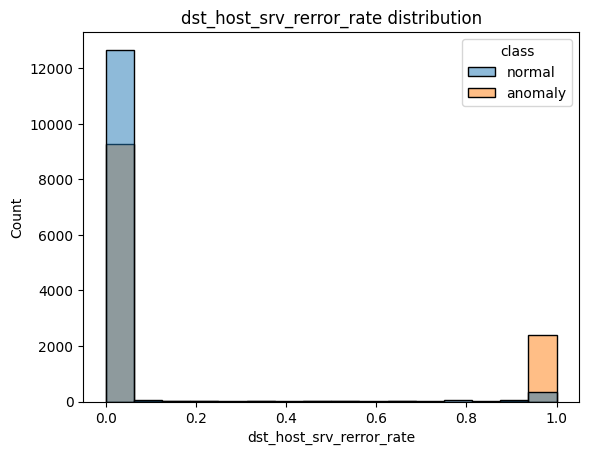

In [17]:
# dst_host_srv_rerror_rate histgram
sns.histplot(data=df, x='dst_host_srv_rerror_rate', hue ='class')
plt.title("dst_host_srv_rerror_rate distribution")

For `dst_host_srv_rerror_rate` (connection reset errors to the same service on the same host), we again see a strong difference: normal traffic has near-zero error rates, while anomalies peak at the maximum (1.0). This feature appears to be another reliable signal for detecting abnormal activity.


Across all four error rate features, anomalous traffic consistently shows error rates near 1.0, whereas normal traffic remains close to 0. These features are highly discriminative and likely to be important for any model or rule-based detection.

Go to 
* [Main page](https://github.com/SelinaFischer/unmasking_hidden_cyber_threats_t5/tree/main) 
* [ETL pipeline](https://github.com/SelinaFischer/unmasking_hidden_cyber_threats_t5/blob/main/jupyter_notebooks/1.%20etl_data_prep.ipynb)
* [Hypothesis Validation](https://github.com/SelinaFischer/unmasking_hidden_cyber_threats_t5/blob/main/jupyter_notebooks/3.%20hypothesis_validation.ipynb)